# <center>ESTADÍSTICAS NWSL 2023</center>

En este notebook se analizarán los datos de la NWSL para la temporadad 2023, en primer lugar se importarán las librerías con las que se va a trabajar. Los csv con los datos fueron descargados de [Kaggle](https://www.kaggle.com/) del ususario [Dakota Mills](https://www.kaggle.com/datasets/dakotamills/2023-nwsl-stats?select=2023+NWSL+Stats+by+Team.csv) que los recopiló de [National Women's Soccer League's Website](https://www.nwslsoccer.com/) y de [FBref Website](https://fbref.com/en/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import os

from PIL import Image
from highlight_text import fig_text

from mplsoccer import add_image

Los datos a analizar se corresponden con las estadísticas por cada equipo.

In [2]:
equipos = pd.read_csv('2023 NWSL Stats by Team.csv')

In [3]:
equipos

,Rank,Team,Team_Abbr,GP,G,A,S,SOG,FC,OFF,CK,PKG,YC,RC,Unnamed: 14,Unnamed: 15
0,1,Portland Thorns FC,POR,23,42,31,291,151,179,45,124,2,21,1,NaN,https://www.nwslsoccer.com/stats/teams?season=...
1,2,Seattle Reign FC,RGN,25,32,25,217,106,253,51,92,3,34,1,NaN,NaN
2,3,Angel City FC,LA,23,31,24,213,105,247,53,165,1,30,0,NaN,NaN
3,4,San Diego Waves FC,SD,23,31,19,213,114,232,64,110,2,32,1,NaN,NaN
4,5,Kansas City Current,KC,22,30,20,196,96,207,34,97,4,27,0,NaN,NaN
5,6,NJ/NY Gotham FC,NJY,25,30,18,253,119,281,34,146,4,47,1,NaN,NaN
6,7,North Carolina Courage,NC,23,29,22,188,93,216,52,99,2,25,2,NaN,NaN
7,8,Chicago Red Stars,CHI,22,28,16,154,69,230,31,98,2,26,0,NaN,NaN
8,9,Orlando Pride,ORL,22,27,18,211,103,233,34,122,4,24,1,NaN,NaN
9,10,Washington Spirit,WAS,22,26,14,216,102,259,27,93,5,29,2,NaN,NaN


Como se puede comprobar los datos no están ordenados alfabéticamente según el equipo, por lo tanto se va a realizar esa correción para evitar futuros problemas. Además hay que modficar el nombre del equipo Seattle Reign FC ya que ese es el nombre que vuelve a adoptar para la temporada 2024 despuñes de un par de temporadas llamandose OL Reign FC.

In [4]:
equipos=equipos.replace(['Seattle Reign FC'],'OL Reign FC')

In [5]:
equipos

,Rank,Team,Team_Abbr,GP,G,A,S,SOG,FC,OFF,CK,PKG,YC,RC,Unnamed: 14,Unnamed: 15
0,1,Portland Thorns FC,POR,23,42,31,291,151,179,45,124,2,21,1,NaN,https://www.nwslsoccer.com/stats/teams?season=...
1,2,OL Reign FC,RGN,25,32,25,217,106,253,51,92,3,34,1,NaN,NaN
2,3,Angel City FC,LA,23,31,24,213,105,247,53,165,1,30,0,NaN,NaN
3,4,San Diego Waves FC,SD,23,31,19,213,114,232,64,110,2,32,1,NaN,NaN
4,5,Kansas City Current,KC,22,30,20,196,96,207,34,97,4,27,0,NaN,NaN
5,6,NJ/NY Gotham FC,NJY,25,30,18,253,119,281,34,146,4,47,1,NaN,NaN
6,7,North Carolina Courage,NC,23,29,22,188,93,216,52,99,2,25,2,NaN,NaN
7,8,Chicago Red Stars,CHI,22,28,16,154,69,230,31,98,2,26,0,NaN,NaN
8,9,Orlando Pride,ORL,22,27,18,211,103,233,34,122,4,24,1,NaN,NaN
9,10,Washington Spirit,WAS,22,26,14,216,102,259,27,93,5,29,2,NaN,NaN


In [6]:
df1=equipos.sort_values('Team')

In [7]:
df1

,Rank,Team,Team_Abbr,GP,G,A,S,SOG,FC,OFF,CK,PKG,YC,RC,Unnamed: 14,Unnamed: 15
2,3,Angel City FC,LA,23,31,24,213,105,247,53,165,1,30,0,NaN,NaN
7,8,Chicago Red Stars,CHI,22,28,16,154,69,230,31,98,2,26,0,NaN,NaN
11,12,Houston Dash,HOU,22,16,10,201,86,236,31,97,1,27,3,NaN,NaN
4,5,Kansas City Current,KC,22,30,20,196,96,207,34,97,4,27,0,NaN,NaN
5,6,NJ/NY Gotham FC,NJY,25,30,18,253,119,281,34,146,4,47,1,NaN,NaN
6,7,North Carolina Courage,NC,23,29,22,188,93,216,52,99,2,25,2,NaN,NaN
1,2,OL Reign FC,RGN,25,32,25,217,106,253,51,92,3,34,1,NaN,NaN
8,9,Orlando Pride,ORL,22,27,18,211,103,233,34,122,4,24,1,NaN,NaN
0,1,Portland Thorns FC,POR,23,42,31,291,151,179,45,124,2,21,1,NaN,https://www.nwslsoccer.com/stats/teams?season=...
10,11,Racing Louisville FC,LOU,22,25,11,236,111,239,50,119,5,32,2,NaN,NaN


Además se va a eliminar las columnas unnamed que tienen valores NaN, que no van a servir para analizar:

In [8]:
df = df1.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1)

In [9]:
df

,Rank,Team,Team_Abbr,GP,G,A,S,SOG,FC,OFF,CK,PKG,YC,RC
2,3,Angel City FC,LA,23,31,24,213,105,247,53,165,1,30,0
7,8,Chicago Red Stars,CHI,22,28,16,154,69,230,31,98,2,26,0
11,12,Houston Dash,HOU,22,16,10,201,86,236,31,97,1,27,3
4,5,Kansas City Current,KC,22,30,20,196,96,207,34,97,4,27,0
5,6,NJ/NY Gotham FC,NJY,25,30,18,253,119,281,34,146,4,47,1
6,7,North Carolina Courage,NC,23,29,22,188,93,216,52,99,2,25,2
1,2,OL Reign FC,RGN,25,32,25,217,106,253,51,92,3,34,1
8,9,Orlando Pride,ORL,22,27,18,211,103,233,34,122,4,24,1
0,1,Portland Thorns FC,POR,23,42,31,291,151,179,45,124,2,21,1
10,11,Racing Louisville FC,LOU,22,25,11,236,111,239,50,119,5,32,2


# ANÁLISIS

A continución se van a hacer una serie de representaciones de los datos con algunas posibles opciones para cada uno con las abrevaciones, otra con los escudos de cada uno de los equipos y una mezcla de ambas. Se representarán tambien en horizontal y vertical. Esta representación se hará para el primer conjunto de datos analizados, para el resto se utilizará la que más le agradó a la creadora. Pero primero se creará una paleta para representar a cada uno de los equipos, partiendo de lo colores característicos de los mismos.

In [10]:
color_angel="#FFC0CB"
color_chicago="#FF0000"
color_houston="#FFA500"
color_kansas="#40E0D0"
color_nj="#00FFFF"
color_north="#00008B"
color_ol="#0000FF"
color_orlando="#800080"
color_portland="#DC143C"
color_racing="#DDA0DD"
color_san="#FF00FF"
color_was="#000000"

In [11]:
mi_paleta = [color_angel,color_chicago,color_houston,color_kansas,color_nj,color_north,color_ol,color_orlando,color_portland,color_racing,color_san,color_was]

Las imágenes estan en otra carpeta por lo tanto hay que escribir la ruta de la misma:

In [12]:
path='C:\\Users\\lal99\\PROYECTOS\\FUTBOL\\LOGOS\\'

In [13]:
# Logo liga
nwsl = plt.imread(path+"nwsl.png")

# Escudos
escudo_angel = plt.imread(path+"Angel_City_FC.png")
escudo_chicago = plt.imread(path+"Chicago_Red_Stars.png")
escudo_houston = plt.imread(path+"Houston_Dash.png")
escudo_kansas = plt.imread(path+"Kansas_City_Current.png")
escudo_nj = plt.imread(path+"NY_Gotham.png")
escudo_north = plt.imread(path+"NC_Courage.png")
escudo_ol = plt.imread(path+"OL_Reign.png")
escudo_orlando = plt.imread(path+"Orlando_Pride.png")
escudo_portland = plt.imread(path+"Portland_Thorns.png")
escudo_racing = plt.imread(path+"Racing_Louisville.png")
escudo_san = plt.imread(path+"San_Diego.png")
escudo_was = plt.imread(path+"Washington_Spirit.png")

In [14]:
sns.set_palette(mi_paleta)

Ahora obtenemos la información de cada una de las columnas:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2 to 9
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       12 non-null     int64 
 1   Team       12 non-null     object
 2   Team_Abbr  12 non-null     object
 3   GP         12 non-null     int64 
 4   G          12 non-null     int64 
 5   A          12 non-null     int64 
 6   S          12 non-null     int64 
 7   SOG        12 non-null     int64 
 8   FC         12 non-null     int64 
 9   OFF        12 non-null     int64 
 10  CK         12 non-null     int64 
 11  PKG        12 non-null     int64 
 12  YC         12 non-null     int64 
 13  RC         12 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 1.4+ KB


# PARTIDOS JUGADOS

Se hará una representación en un diagrama de barras tanto en horizontal como en vertical, esto es para comprobar cual se entiende mejor a simple vista. Además se representará también usando los escudos de los equipos.

## HORIZONTAL

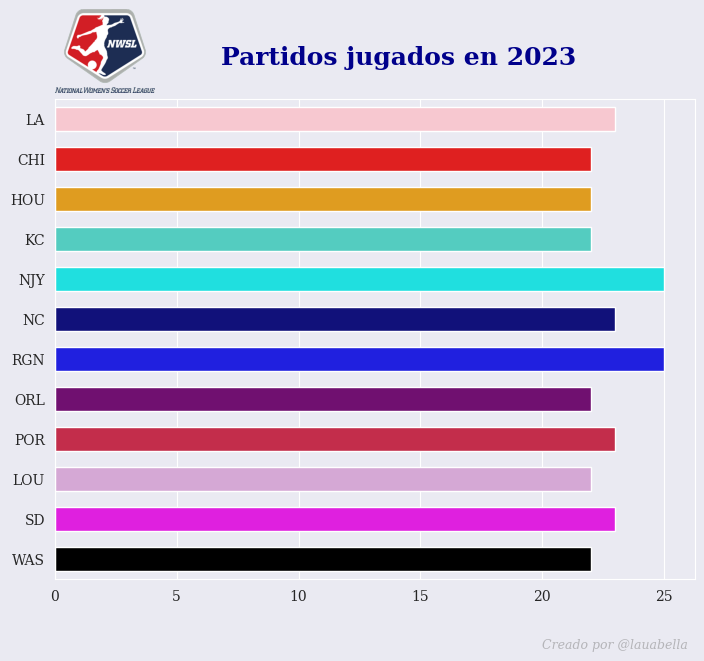

In [17]:
# REPRESENTACIÓN CON LAS ABREVIATURAS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=df['GP'], y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Partidos jugados en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

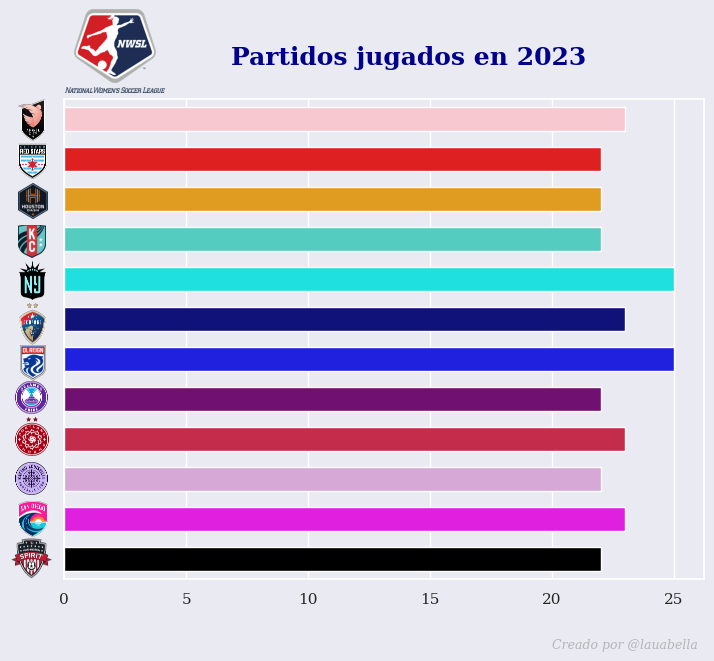

In [340]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=df['GP'], y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Partidos jugados en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Eliminar los ticks del eje y
plt.gca().set_yticks([])

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.03, bottom=0.83, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.03, bottom=0.76, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.035, bottom=0.70, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.037, bottom=0.635, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.03, bottom=0.565, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.03, bottom=0.49, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.035, bottom=0.43, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.037, bottom=0.375, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.031, bottom=0.305, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.036, bottom=0.24, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.035, bottom=0.17, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.03, bottom=0.10, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

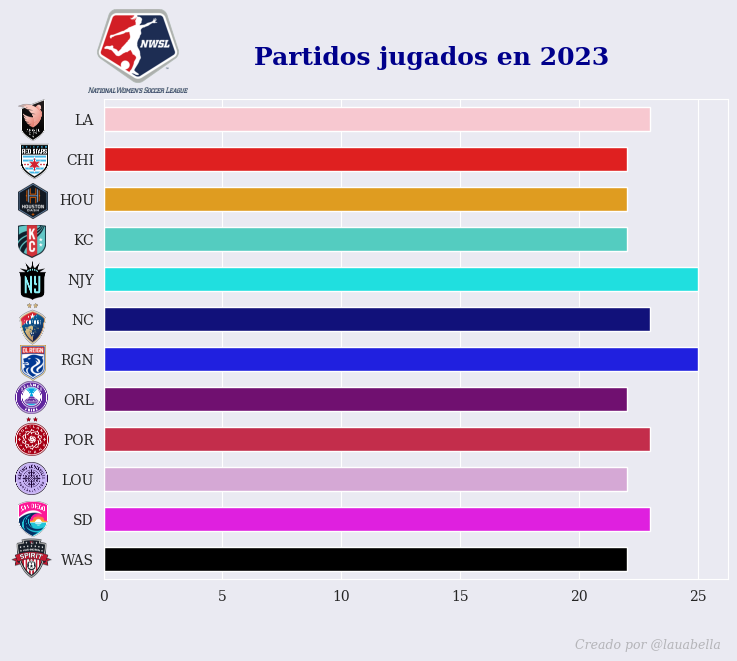

In [18]:
# REPRESENTACIÓN CON LAS ABREVIATURAS Y LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=df['GP'], y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Partidos jugados en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.001, bottom=0.83, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.004, bottom=0.76, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.006, bottom=0.70, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.008, bottom=0.635, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.001, bottom=0.565, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.001, bottom=0.49, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.006, bottom=0.43, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.008, bottom=0.375, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.002, bottom=0.305, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.007, bottom=0.24, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.006, bottom=0.17, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.001, bottom=0.10, width=0.06, height=0.07)

plt.subplots_adjust(left=0.12, right=0.9, top=0.9, bottom=0.1)

plt.show()

## VERTICAL

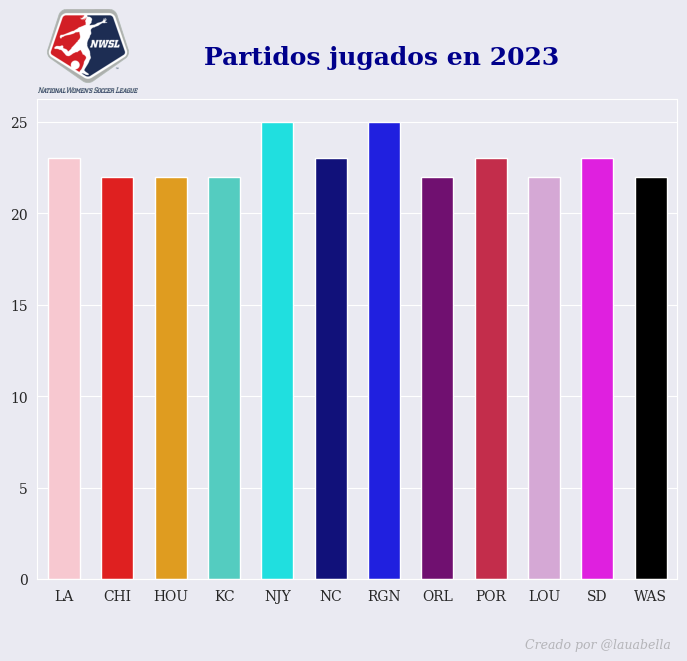

In [19]:
# REPRESENTACIÓN CON LAS ABREVIATURAS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=df['Team_Abbr'], y=df['GP'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Partidos jugados en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Añadir logo de la liga
ax_image = add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

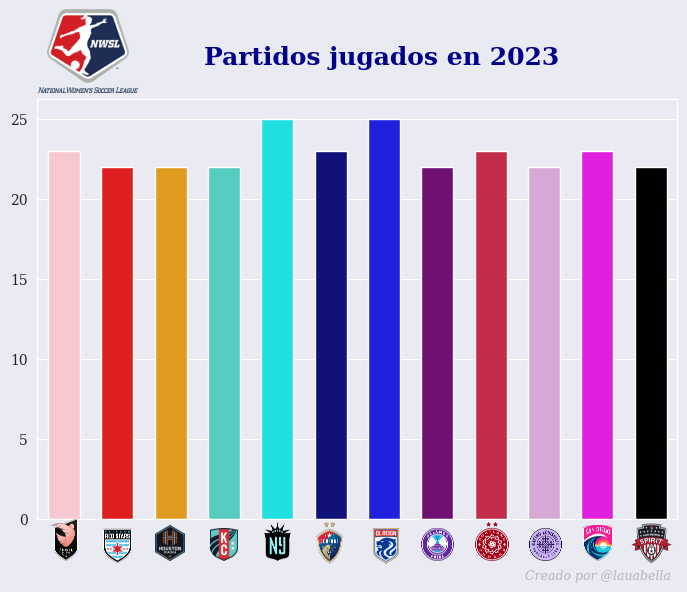

In [20]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=df['Team_Abbr'], y=df['GP'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Partidos jugados en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Eliminar los ticks del eje x
plt.gca().set_xticks([])

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.105, bottom=0.13, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.17, bottom=0.12, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.24, bottom=0.13, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.31, bottom=0.13, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.37, bottom=0.13, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.435, bottom=0.125, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.51, bottom=0.125, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.578, bottom=0.13, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.64, bottom=0.13, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.713, bottom=0.13, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.775, bottom=0.13, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.838, bottom=0.125, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

plt.show()

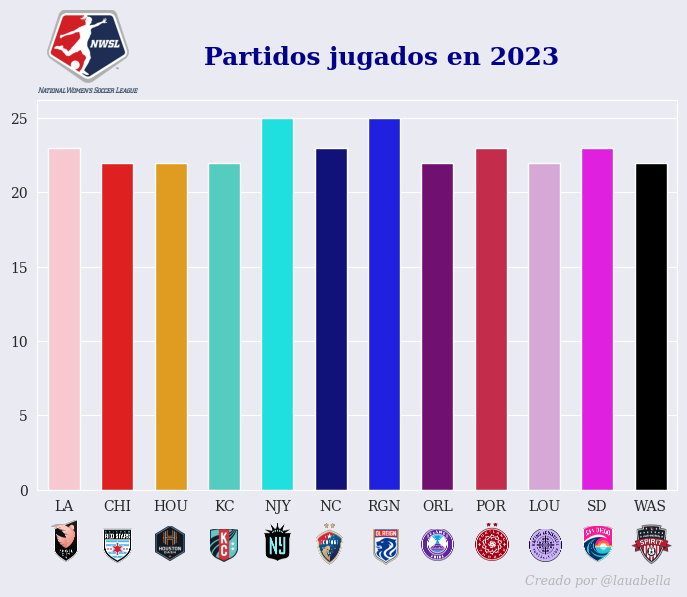

In [21]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=df['Team_Abbr'], y=df['GP'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Partidos jugados en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.25, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)


# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.105, bottom=0.13, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.17, bottom=0.12, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.24, bottom=0.13, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.31, bottom=0.13, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.37, bottom=0.13, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.435, bottom=0.125, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.51, bottom=0.125, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.578, bottom=0.13, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.64, bottom=0.13, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.713, bottom=0.13, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.775, bottom=0.13, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.838, bottom=0.125, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.25)

plt.show()

De todas las representaciones posibles la que se entiende mejor a mi parecer es la de los barplot horizontal con los escudos de los equipos, por ello para las siguientes representaciones. 

Ahora se analizarán los goles por partido (goles totales/nºpartidos), % tiros a puerta (tiros a puerta/tiros totales x100) y el porcentaje de goles por tiro (goles/nº de tiros x100).


# GOLES POR PARTIDO

In [22]:
goles=df['G']/df['GP']

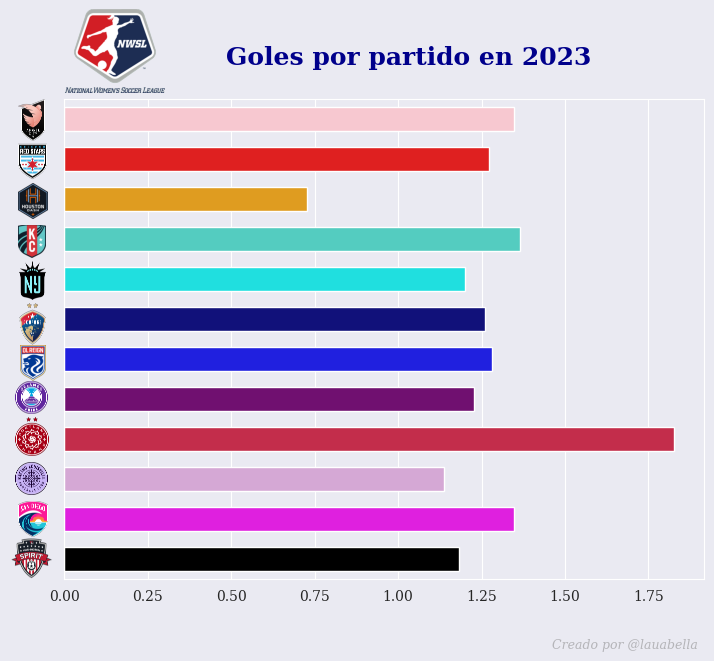

In [23]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=goles, y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('Goles por partido en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Eliminar los ticks del eje y
plt.gca().set_yticks([])

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.03, bottom=0.83, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.03, bottom=0.76, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.035, bottom=0.70, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.037, bottom=0.635, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.03, bottom=0.565, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.03, bottom=0.49, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.035, bottom=0.43, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.037, bottom=0.375, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.031, bottom=0.305, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.036, bottom=0.24, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.035, bottom=0.17, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.03, bottom=0.10, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

# % TIROS A PUERTA

In [24]:
tiros=(df['SOG']/df['S'])*100

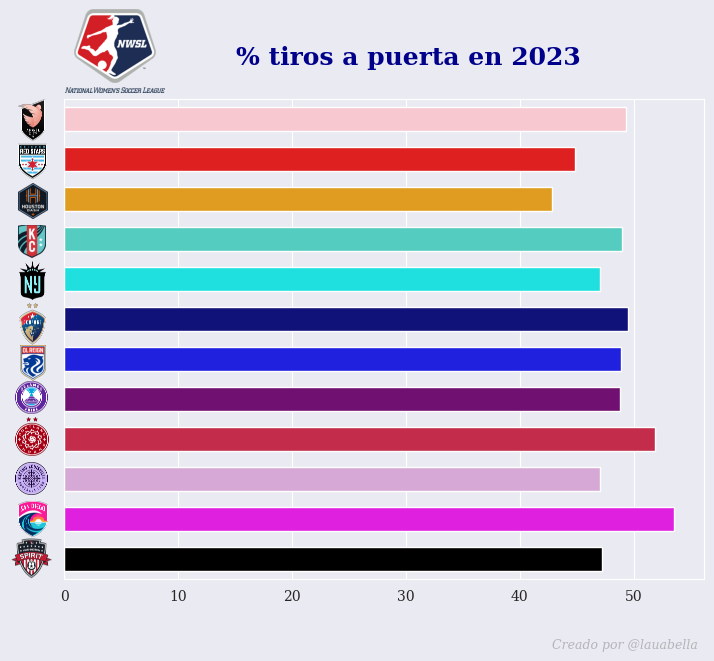

In [25]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=tiros, y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('% tiros a puerta en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.53,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Eliminar los ticks del eje y
plt.gca().set_yticks([])

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.03, bottom=0.83, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.03, bottom=0.76, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.035, bottom=0.70, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.037, bottom=0.635, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.03, bottom=0.565, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.03, bottom=0.49, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.035, bottom=0.43, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.037, bottom=0.375, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.031, bottom=0.305, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.036, bottom=0.24, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.035, bottom=0.17, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.03, bottom=0.10, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

# % DE GOLES POR TIRO

## TOTALES


In [26]:
totales_gol=(df['G']/df['S'])*100

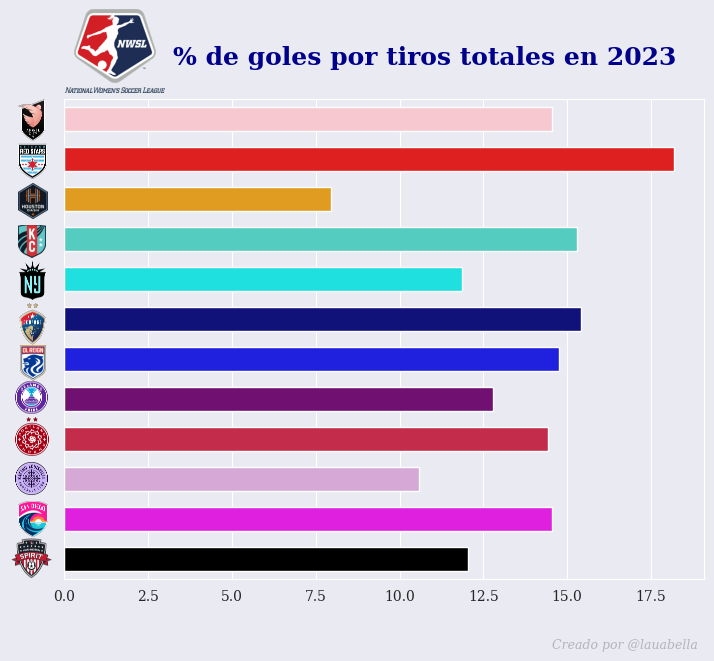

In [27]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=totales_gol, y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('% de goles por tiros totales en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.55,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Eliminar los ticks del eje y
plt.gca().set_yticks([])

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.03, bottom=0.83, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.03, bottom=0.76, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.035, bottom=0.70, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.037, bottom=0.635, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.03, bottom=0.565, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.03, bottom=0.49, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.035, bottom=0.43, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.037, bottom=0.375, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.031, bottom=0.305, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.036, bottom=0.24, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.035, bottom=0.17, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.03, bottom=0.10, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

## A PUERTA

In [28]:
puerta_gol=(df['G']/df['SOG'])*100

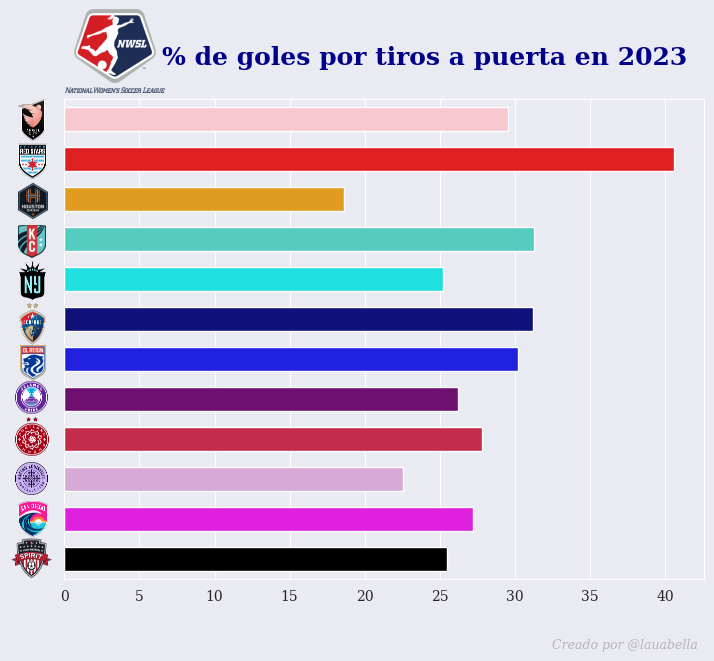

In [29]:
# REPRESENTACIÓN CON LOS ESCUDOS DE LOS EQUIPOS

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=puerta_gol, y=df['Team_Abbr'],width=0.6)

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Obtener el color de fondo del estilo actual de seaborn
background_color = sns.axes_style()["axes.facecolor"]

# Establecer el color de fondo de la figura
fig.patch.set_facecolor(background_color)

# Cambiar el estilo de escritura de la figura
plt.rcParams['font.family'] = 'serif'

plt.ylabel("")
plt.xlabel("")
fig.suptitle('% de goles por tiros a puerta en 2023',fontsize=18, fontweight='bold', color='darkblue',x=0.55,y=0.99)
plt.text(0.99, -0.15, 'Creado por @lauabella', color='gray', fontsize=9, fontstyle='italic', alpha=0.5, ha='right', va='bottom', transform=plt.gca().transAxes)

# Eliminar los ticks del eje y
plt.gca().set_yticks([])

# Se añade el logo de la liga
add_image(nwsl, fig, left=0.10, bottom=0.91, width=0.125, height=0.14)

# Se añaden los escudos
add_image(escudo_angel, fig, left=0.03, bottom=0.83, width=0.06, height=0.07)
add_image(escudo_chicago, fig, left=0.03, bottom=0.76, width=0.06, height=0.07)
add_image(escudo_houston, fig, left=0.035, bottom=0.70, width=0.05, height=0.06)
add_image(escudo_kansas, fig, left=0.037, bottom=0.635, width=0.045, height=0.055)
add_image(escudo_nj, fig, left=0.03, bottom=0.565, width=0.06, height=0.065)
add_image(escudo_north, fig, left=0.03, bottom=0.49, width=0.06, height=0.07)
add_image(escudo_ol, fig, left=0.035, bottom=0.43, width=0.05, height=0.06)
add_image(escudo_orlando, fig, left=0.037, bottom=0.375, width=0.045, height=0.055)
add_image(escudo_portland, fig, left=0.031, bottom=0.305, width=0.055, height=0.065)
add_image(escudo_racing, fig, left=0.036, bottom=0.24, width=0.045, height=0.055)
add_image(escudo_san, fig, left=0.035, bottom=0.17, width=0.05, height=0.06)
add_image(escudo_was, fig, left=0.03, bottom=0.10, width=0.06, height=0.07)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()